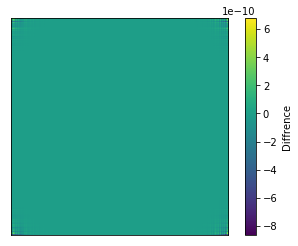

In [203]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Variables


N = 512
cen = np.floor(N/2.0)
Gscale = 8 / N


#Functions


def gaussianGeneration(A = 1.0, sigmaX = 1.0, sigmaY = 1.0):
    """Generates a 2D gaussian array centred on the centre coords"""
    GaussianA = np.zeros((N,N))
    for x in range(0,N):
        for y in range(0,N):
            GaussianA[x,y] = A * np.exp( - ( ((x - cen)*Gscale)**2/(2*sigmaX**2) + ((y - cen)*Gscale)**2/(2*sigmaY**2) ) )
    return GaussianA


def fourierT(inputA, theta = np.zeros((N,N))):
    return np.fft.fft2(inputA)


def thereAndBack(inputA):
    return np.fft.ifft2(np.fft.fft2(inputA))


G = gaussianGeneration( 1, 1, 1)
#Graph Plotting
plot = (np.real(thereAndBack(G))-G)/G
plt.figure()
im = plt.imshow( plot, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical', label = "Diffrence")

max is 25732.66564535036
max location is 131328


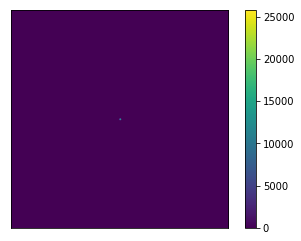

In [204]:
F = fourierT(np.fft.fftshift(G))
X = np.abs(np.fft.ifftshift(np.fft.fft2(G)))
plt.figure()
im = plt.imshow( X, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical')
print("max is " + str(np.amax(X)))
print("max location is " + str(np.argmax(X)))

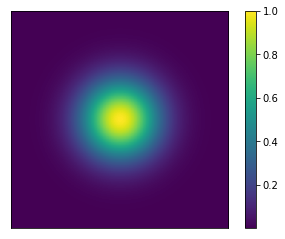

In [205]:
plt.figure()
im = plt.imshow( G, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical')

A

In [14]:
J = np.amax(plot)*100
print("Max percentage error: " + str(J) + " %")

Max percentage error: 6.799802089267087e-08 %


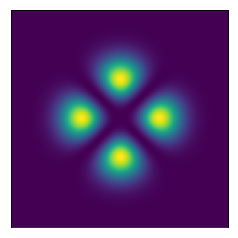

In [19]:
import Laguerre_Gaussian as LG

N = 512

rayleighRangeA = LG.zR(0.13, 500e-9)
spotSizeParamA = LG.wZ(0.13, 10e4, rayleighRangeA)
IntensityA = np.zeros((N,N))
Dist = LG.distances(N, 1/N)
Angl = LG.angles(N)
for i in range(0, N):
    for j in range(0, N):
        IntensityA[i,j] = LG.intensityGenR(Dist[i,j], 10e4, 2, 0, spotSizeParamA, 2*np.pi*np.power(500e-9,-1), rayleighRangeA, Angl[i,j])

plt.figure()
im = plt.imshow( IntensityA, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)

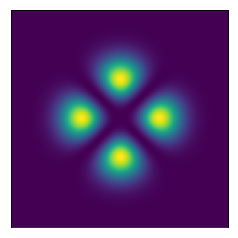

In [20]:
TAB = np.real(thereAndBack(IntensityA))
plt.figure()
im = plt.imshow( TAB, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)

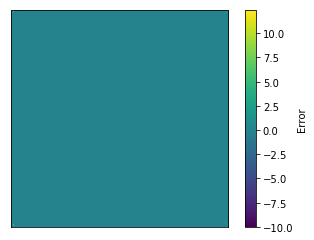

In [60]:
lG = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(IntensityA[i,j] == 0):
            lG[i,j] = 0
        else:
            lG[i,j] = (TAB[i,j] - IntensityA[i,j])/IntensityA[i,j]
lGminus = TAB - IntensityA
plt.figure()
im = plt.imshow( lG*100, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical', label = "Error")

In [38]:
J = np.amax(lG[30:482,30:482]*100)
print("Max percentage error: " + str(J) + " %")
#Error is only large towards the edges of the grid

Max percentage error: 0.00980869643673574 %


In [36]:
J = np.amax(lG*100)
print("Max percentage error: " + str(J) + " %")

Max percentage error: 12.423465381927635 %


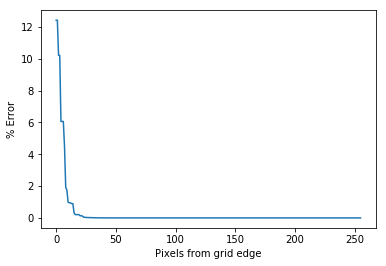

In [80]:
cen = int(np.floor(N/2))
Error = np.zeros(cen)
for i in range(0,cen):
    Error[i] = np.amax(lG[i:N-i,i:N-i])*100
plt.figure()
plt.ylabel("% Error")
plt.xlabel("Pixels from grid edge")
plt.plot(Error)

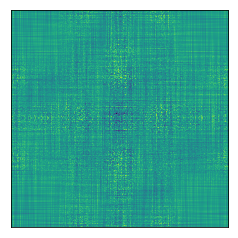

In [58]:
im = plt.imshow( lGminus, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)